Sukurti Python pagrindu veikiančią programą, kuri:

- Nuskaitytų pateiktą nuotrauką.   
- Aptiktų visus pinigus (banknotus ir/ar monetas) nuotraukoje.   
- Kiekvieną aptiktą pinigų objektą vizualiai pažymėtų (pvz., apvedant rėmeliu arba uždedant spalvinį filtrą).   
- Sugeneruotų naują nuotrauką su pažymėtomis pinigų vietomis ir išvestų aptiktų objektų statistiką (pvz., bendrą aptiktų pinigų skaičių).   

Image 'coins.png' loaded successfully.

0: 448x640 3 clocks, 250.9ms
Speed: 3.2ms preprocess, 250.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


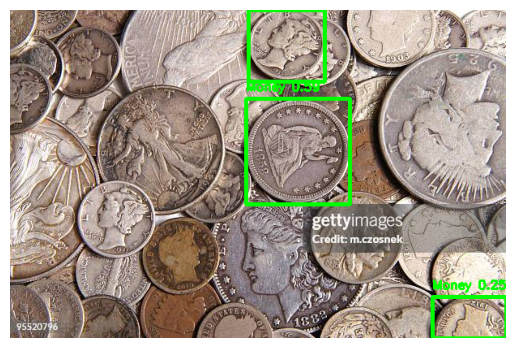

Total money objects detected: 3


In [13]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model (pretrained)
model = YOLO("yolov8n.pt")  # "nano" version for speed

# Money detection function
def detect_money(image_path, output_path="output.jpg"):
    # Load image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: The image '{image_path}' was not found or could not be loaded.")
    else:
        print(f"Image '{image_path}' loaded successfully.")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model(image_rgb)

    # Get detected objects
    detections = results[0].boxes
    num_objects = len(detections)

    # Draw bounding boxes on detected objects
    for box in detections:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        confidence = box.conf[0].item()  # Confidence score
        label = f"Money {confidence:.2f}"

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the new image
    cv2.imwrite(output_path, image)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Print detection statistics
    print(f"Total money objects detected: {num_objects}")

# Run detection
image_path = "coins.png"  # Replace with your image path
detect_money(image_path)

Image 'banknotes.png' loaded successfully.

0: 640x640 2 persons, 130.8ms
Speed: 2.4ms preprocess, 130.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


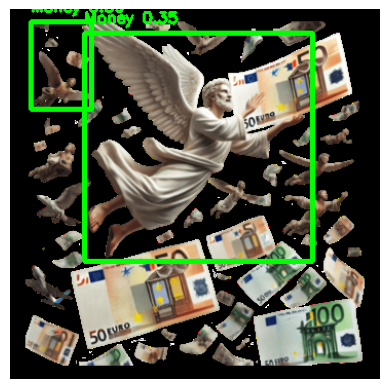

Total money objects detected: 2


In [11]:
# Run detection
image_path = "banknotes.png"  # Replace with your image path
detect_money(image_path)

Image 'banknotes1.png' loaded successfully.

0: 448x640 1 laptop, 1 book, 86.4ms
Speed: 2.3ms preprocess, 86.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


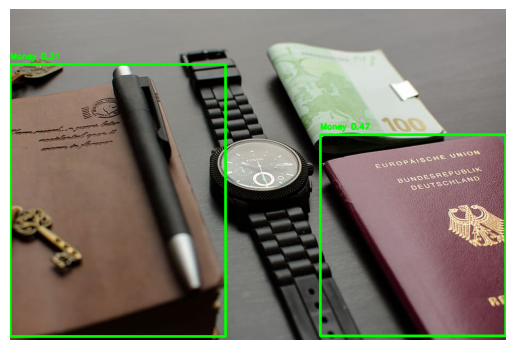

Total money objects detected: 2


In [12]:
# Run detection
image_path = "banknotes1.png"  # Replace with your image path
detect_money(image_path)